# Exploring alternatives to population pyramids

Code for my post [Exploring alternatives to population pyramids](https://gorelik.net/2020/09/02/exploring-alternatives-to-population-pyramids/)

The data is taken from http://populationpyramid.net/

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
uae19 = pd.read_csv('United Arab Emirates-2019.csv')
uae54 = pd.read_csv('United Arab Emirates-1954.csv')
isr19 = pd.read_csv('Israel-2019.csv')
china90 = pd.read_csv('China-1990.csv')
world19 = pd.read_csv('WORLD-2019.csv')

In [3]:
world19.head()

,Age,M,F
0,0-4,349247348,328119059
1,5-9,341670620,320090537
2,10-14,328942130,307203261
3,15-19,314806147,293931999
4,20-24,307809031,288834393


In [4]:
gender_colors = {'M': '#4582b4', 'F': '#ee798a'}

In [5]:
def classic_pyramid(df, ttl=None, ax=None):
    df = df.copy()
    total = df['M'].sum() + df['F'].sum()
    df['M'] = -100 * df['M'] / total # to reverse the direction
    df['F'] = 100 * df['F'] / total 
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 6), dpi=120)

    for what in ['M', 'F']:
        sns.barplot(
            x=what, 
            y='Age', 
            color=gender_colors[what],
            data=df, 
            lw=0, 
            ax=ax
        )
    ax.set_ylim(reversed(ax.get_ylim()))
    tks = ax.get_xticks()
    lbls = [f'{np.abs(t):.0f}%' for t in tks]
    ax.set_xticklabels(lbls)
    ax.set_xlabel('')
    ax.set_ylabel('')


    tks = ax.get_yticks()[0::2]
    lbls = ax.get_yticklabels()[0::2]
    ax.set_yticks(tks)
    ax.set_yticklabels(lbls)

    if ttl:
        ax.set_title(ttl)
    sns.despine(ax=ax, left=True)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    return ax

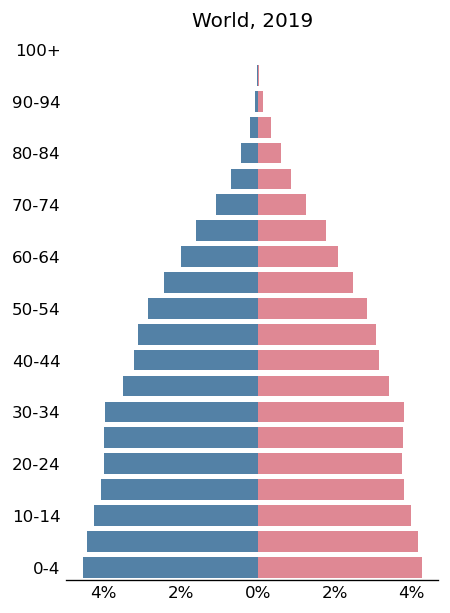

In [6]:
classic_pyramid(world19, 'World, 2019')

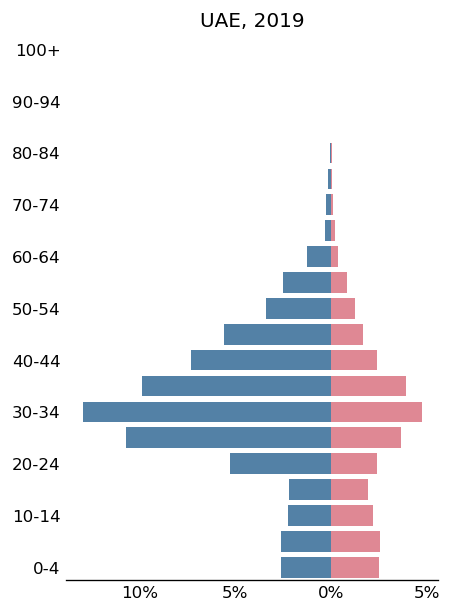

In [7]:
classic_pyramid(uae19, 'UAE, 2019')

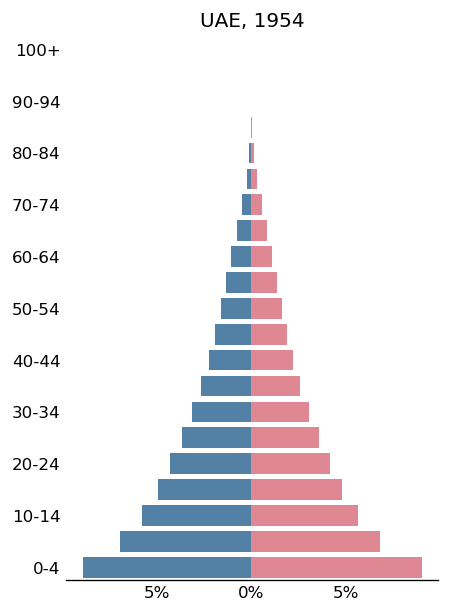

In [8]:
classic_pyramid(uae54, 'UAE, 1954')

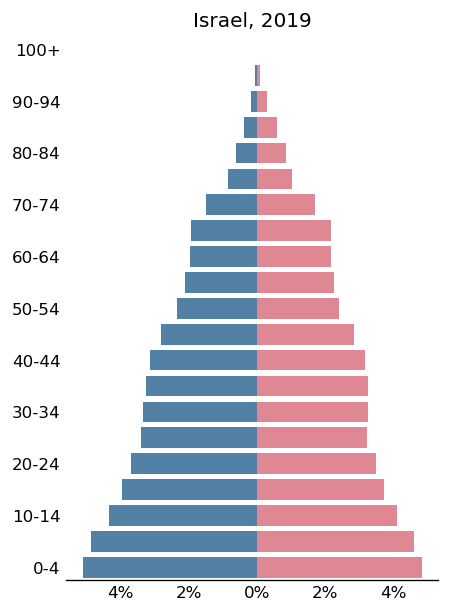

In [9]:
classic_pyramid(isr19, 'Israel, 2019')

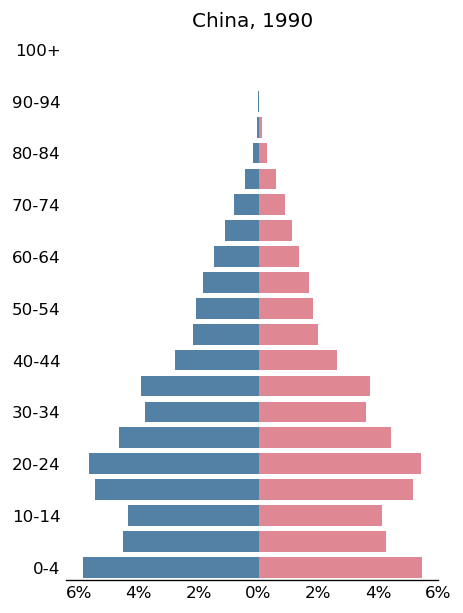

In [10]:
classic_pyramid(china90, 'China, 1990')

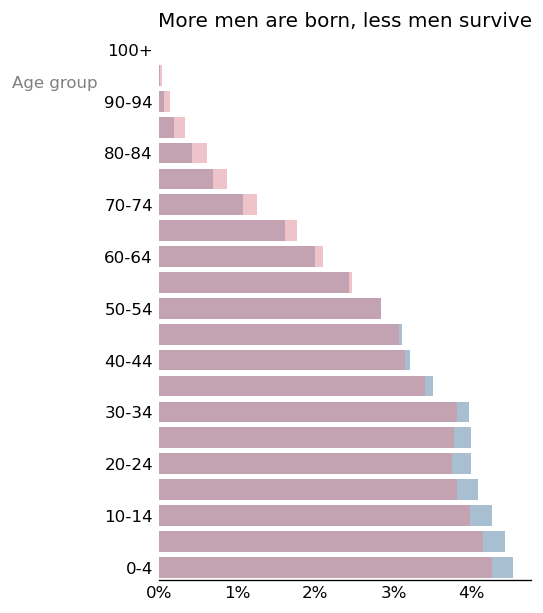

In [11]:
def overlapping_pyramid(df, ttl=None, ax=None):
    df = df.copy()
    total = df['M'].sum() + df['F'].sum()
    df['M'] = 100 * df['M'] / total
    df['F'] = 100 * df['F'] / total 
    if ax is None:
        _, ax = plt.subplots(figsize=(4, 6), dpi=120)

    for what in ['M', 'F']:
        sns.barplot(
            x=what, 
            y='Age', 
            color=gender_colors[what],
            data=df, 
            lw=0, 
            ax=ax, alpha=0.5
        )
    ax.set_ylim(reversed(ax.get_ylim()))
    tks = ax.get_xticks()
    lbls = [f'{np.abs(t):.0f}%' for t in tks]
    ax.set_xticklabels(lbls)
    ax.set_xlabel('')
    ax.set_ylabel('Age group', rotation=0, y=0.9, ha='right', color='gray')

    tks = ax.get_yticks()[0::2]
    lbls = ax.get_yticklabels()[0::2]
    ax.set_yticks(tks)
    ax.set_yticklabels(lbls)

    if ttl:
        ax.set_title(ttl)
    sns.despine(ax=ax, left=True)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.figure.set_facecolor('white')
    return ax
overlapping_pyramid(world19, 'More men are born, less men survive')

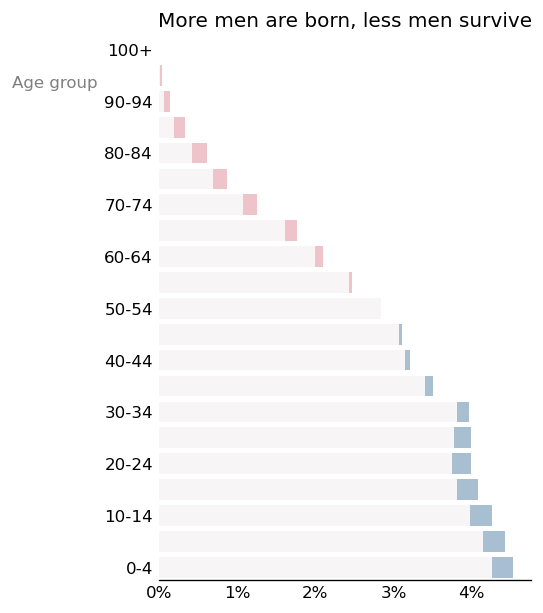

In [12]:

def emphasize_diffs(df, ttl=None, ax=None):
    total = df['M'].sum() + df['F'].sum()
    df['M'] = 100 * df['M'] / total
    df['F'] = 100 * df['F'] / total # to reverse the direction
    df['mn'] = df.apply(lambda row: min(row.M, row.F), axis=1)


    if ax is None:
        _, ax = plt.subplots(figsize=(4, 6), dpi=120)

    for what in ['M', 'F']:
        sns.barplot(
            x=what, 
            y='Age', 
            color=gender_colors[what],
            data=df, 
            lw=0, 
            ax=ax, alpha=0.5
        )
    sns.barplot(x='mn', y='Age', color='white', data=df, lw=0, ax=ax, alpha=0.9)
    ax.set_ylim(reversed(ax.get_ylim()))
    tks = ax.get_xticks()
    lbls = [f'{np.abs(t):.0f}%' for t in tks]
    ax.set_xticklabels(lbls)
    ax.set_xlabel('')
    ax.set_ylabel('Age group', rotation=0, y=0.9, ha='right', color='gray')


    tks = ax.get_yticks()[0::2]
    lbls = ax.get_yticklabels()[0::2]
    ax.set_yticks(tks)
    ax.set_yticklabels(lbls)

    if ttl:
        ax.set_title(ttl)
    sns.despine(ax=ax, left=True)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.figure.set_facecolor('white')
    return ax
emphasize_diffs(world19, 'More men are born, less men survive')

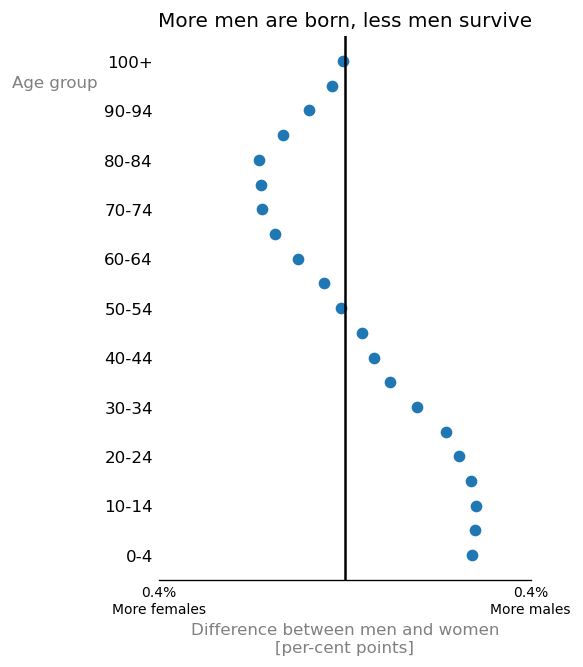

In [13]:

def show_diffs(df, ttl=None, ax=None):
    total = df['M'].sum() + df['F'].sum()
    df['M'] = 100 * df['M'] / total
    df['F'] = 100 * df['F'] / total # to reverse the direction
    df['delta'] = df['M'] - df['F']

    if ax is None:
        _, ax = plt.subplots(figsize=(4, 6), dpi=120)

    ax.plot(df.delta, range(len(df)), 'o')
    tks = list(range(0, len(df), 2))
    ax.set_yticks(tks)
    ax.set_yticklabels(df.Age.iloc[tks])
    ax.axvline(0, color='k')
    tks = ax.get_xticks()
    mx = np.max(np.abs(tks))
    tks = [-mx, 0, mx]
    lbls = [f'{mx:.1f}%\nMore females', '', f'{mx:.1f}%\nMore males']
    ax.set_xticks(tks)
    ax.set_xticklabels(lbls, fontsize='smaller')
    ax.set_xlabel('Difference between men and women\n[per-cent points]', color='gray')
    ax.set_ylabel('Age group', rotation=0, y=0.9, ha='right', color='gray')

    if ttl:
        ax.set_title(ttl)
    sns.despine(ax=ax, left=True)
    ax.tick_params(axis=u'both', which=u'both',length=0)
    ax.figure.set_facecolor('white')
    return ax
ax = show_diffs(world19, 'More men are born, less men survive')


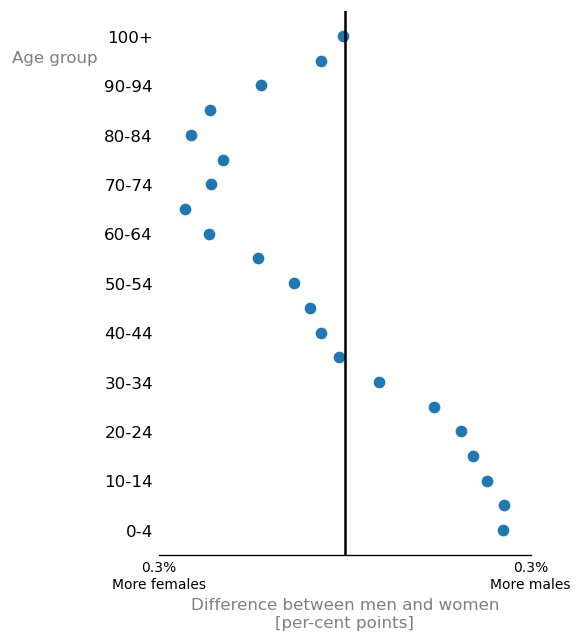

In [14]:
show_diffs(isr19)

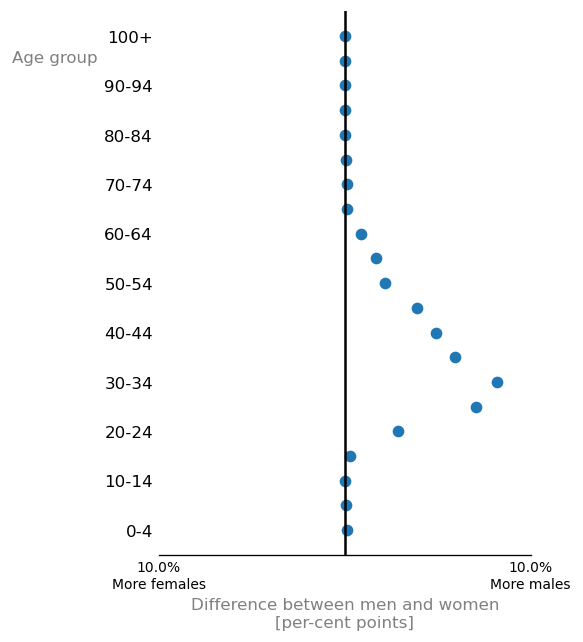

In [15]:
show_diffs(uae19)

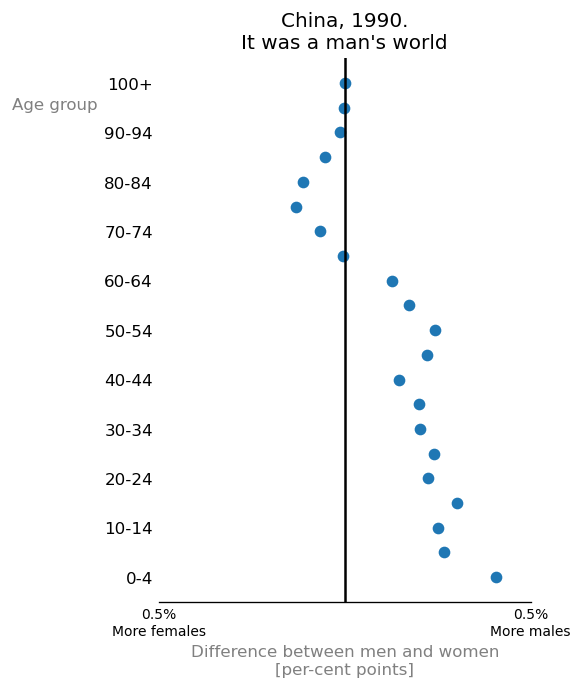

In [16]:
show_diffs(china90, "China, 1990.\nIt was a man's world")

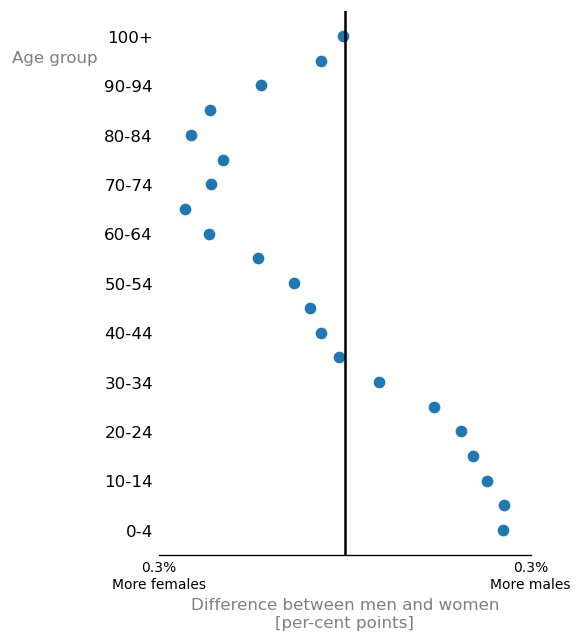

In [17]:
show_diffs(isr19)